In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
num_floors = 15
num_elevators = 3
num_episodes = 500
steps_per_episode = 50
alpha = 0.2
epsilon = 0.1
gamma = 0.8

Episode0/500
Episode50/500
Episode100/500
Episode150/500
Episode200/500
Episode250/500
Episode300/500
Episode350/500
Episode400/500
Episode450/500
Q Table =  [[2.26117491e-01 2.34881024e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.72407813e-01 7.55649672e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.85332351e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 8.55014982e-03 0.00000000e+00 0.00000000e+00
  2.53465581e-02 4.24878464e-03 0.00000000e+00 2.45473559e-02
  0.00000000e+00 2.99119709e-02 2.09837234e-02]
 [3.40855926e-03 2.70940481e-03 1.88274709e-01 0.00000000e+00
  4.31638112e-03 2.58609398e-03 0.00000000e+00 3.27719934e-03
  3.38770551e-03 2.81732345e-03 4.17648663e-01 2.89197777e-03
  1.93706653e+00 3.18968875e-03 2.94465704e-03]
 [1.01000688e-01 1.59857525e-02 5.05729796e-02 4.01662095e-02
  3.50247030e-02 1.32279030e-02 4.15722653e-02 8.47164346e-04
  3.15482451e-02

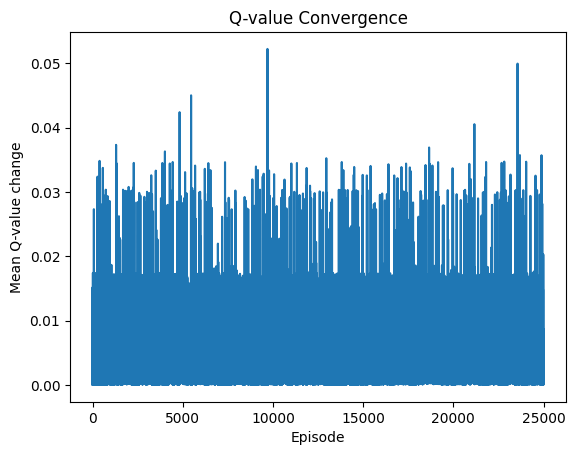

In [ ]:
def choose_action(state, q_table):
  if np.random.uniform(0,1) < epsilon:
    return np.random.choice(num_floors)
  else:
    return np.argmax(q_table[state])

def simulate_elevator(actions, passenger_req):
    rewards = np.zeros(num_elevators)
    new_passenger_req = np.random.randint(0, num_floors, num_elevators)

    for i in range(num_elevators):
        if actions[i] == passenger_req[i]:
            rewards[i] += 7

    return new_passenger_req, rewards


def main():
  q_table = np.zeros((num_floors, num_floors))
  change_q_val = []

  for episode in range(num_episodes):
    state = np.random.randint(0, num_floors)

    for step in range(steps_per_episode):
      actions = [choose_action(state, q_table) for _ in range(num_elevators)]
      passenger_reqs = np.random.randint(0, num_floors, num_elevators)

      new_passenger_req, rewards = simulate_elevator(actions, passenger_reqs)
      next_state =int( np.mean(new_passenger_req))

      Gt = sum(rewards)

      prev_q_table = np.copy(q_table)
      for i in range(num_elevators):
        q_table[state, actions[i]] = q_table[state, actions[i]] + alpha*(Gt - q_table[state, actions[i]])

      change_q_val.append(np.abs(q_table - prev_q_table).mean())

      state = next_state

    if episode % 50 == 0:
      print(f"Episode{episode}/{num_episodes}")

  print("Q Table = ", q_table)


  plt.plot(change_q_val)
  plt.xlabel("Episode")
  plt.ylabel("Mean Q-value change")
  plt.title("Q-value Convergence")
  plt.show()


if __name__ == "__main__":
  main()